In [1]:
import mne
import numpy as np 
import matplotlib.pyplot as plt
import torch
import os
from sklearn.pipeline import Pipeline

In [2]:
data_loc = "./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/"
raw = mne.io.read_raw_edf('./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf', preload=True)
annotations = raw.annotations
annotations 

Extracting EDF parameters from c:\Users\priya\Documents\GitHub\EEG-GAN\EEGData\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


<Annotations | 30 segments: T0 (15), T1 (7), T2 (8)>

In [3]:
event_descriptions, event_counts = np.unique(annotations.description, return_counts=True)

# Print event descriptions and their counts
for desc, count in zip(event_descriptions, event_counts):
    print(f"Event: {desc}, Count: {count}")

# Select specific event type (replace 'event_type' with your desired event description)
event_type = 'event_type'
events = annotations[annotations.description == event_type]

# Print out event onset times and durations
for idx, event in enumerate(events):
    print(f"Event {idx + 1}: Onset: {event['onset']:.2f}, Duration: {event['duration']:.2f}")

Event: T0, Count: 15
Event: T1, Count: 7
Event: T2, Count: 8


In [4]:
# Replace 'your_file.edf' with the actual path to your EDF file
raw =  mne.io.read_raw_edf('./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf', preload=True)

# Get EEG data for all channels
eeg_data = raw.get_data()

# Print the shape of the EEG data array
print("EEG data shape:", eeg_data.shape)

Extracting EDF parameters from c:\Users\priya\Documents\GitHub\EEG-GAN\EEGData\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG data shape: (64, 20000)


In [5]:
# List of EDF file paths
edf_files = ['./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf', 
'./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf',
'./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf']

# List comprehension to read all EDF files
raw_list = [mne.io.read_raw_edf(edf_file, preload=True) for edf_file in edf_files]

# Extract EEG data for all channels from each raw object
eeg_data_list = [raw.get_data() for raw in raw_list]

# Print the shape of the EEG data arrays for each file
for idx, eeg_data in enumerate(eeg_data_list):
    print(f"EEG data shape for file {edf_files[idx]}:", eeg_data.shape)

Extracting EDF parameters from c:\Users\priya\Documents\GitHub\EEG-GAN\EEGData\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from c:\Users\priya\Documents\GitHub\EEG-GAN\EEGData\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from c:\Users\priya\Documents\GitHub\EEG-GAN\EEGData\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
EEG data shape for file ./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf: (64, 20000)
EEG data shape for file ./EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S00

Using matplotlib as 2D backend.


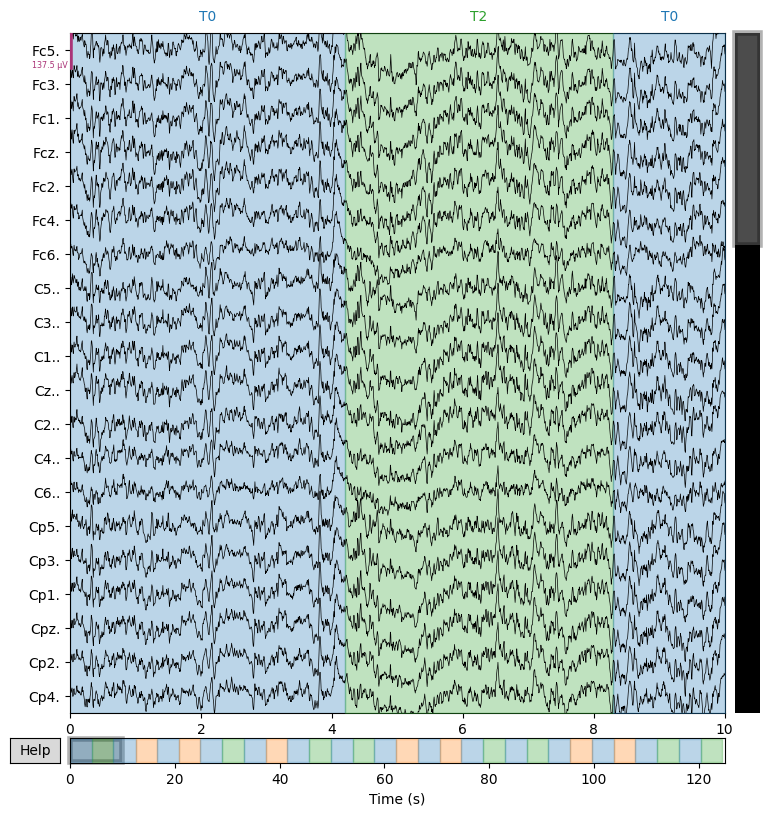

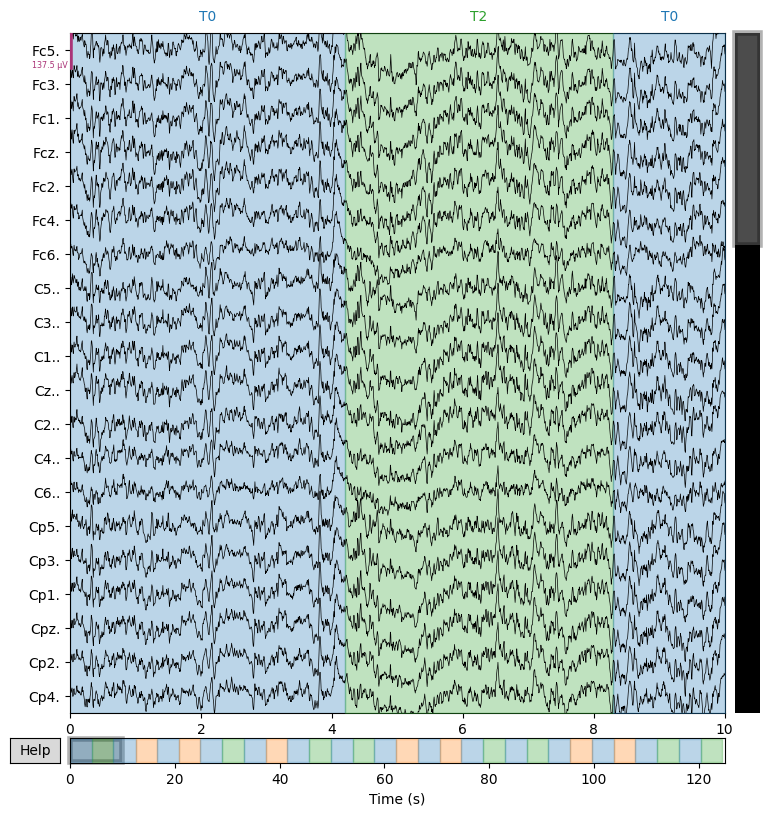

In [6]:
raw_list[0].plot(scalings='auto', title='EEG Channels')

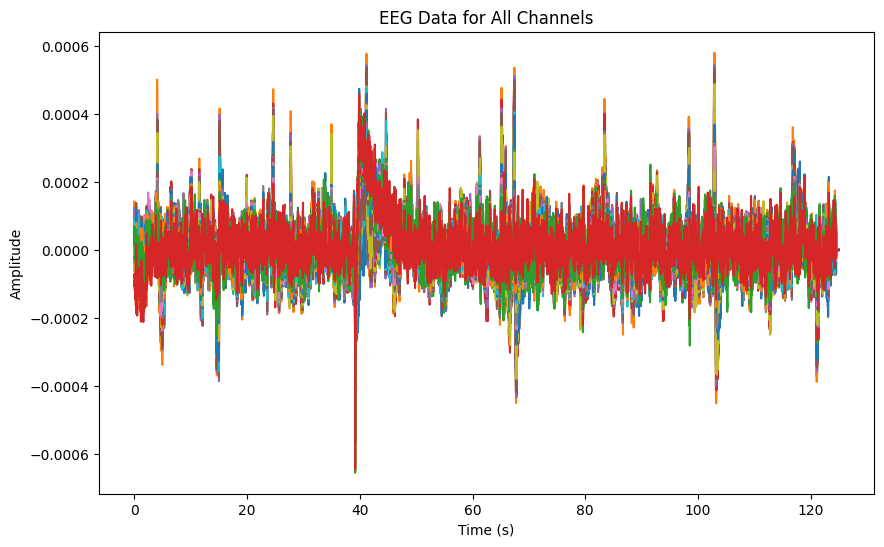

In [7]:
eeg_data = raw_list[0].get_data()
time = raw_list[0].times

# Plot EEG data for all channels using Matplotlib
plt.figure(figsize=(10, 6))
for ch_idx in range(eeg_data.shape[0]):
    plt.plot(time, eeg_data[ch_idx], label=f'Channel {ch_idx + 1}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data for All Channels')
plt.show()

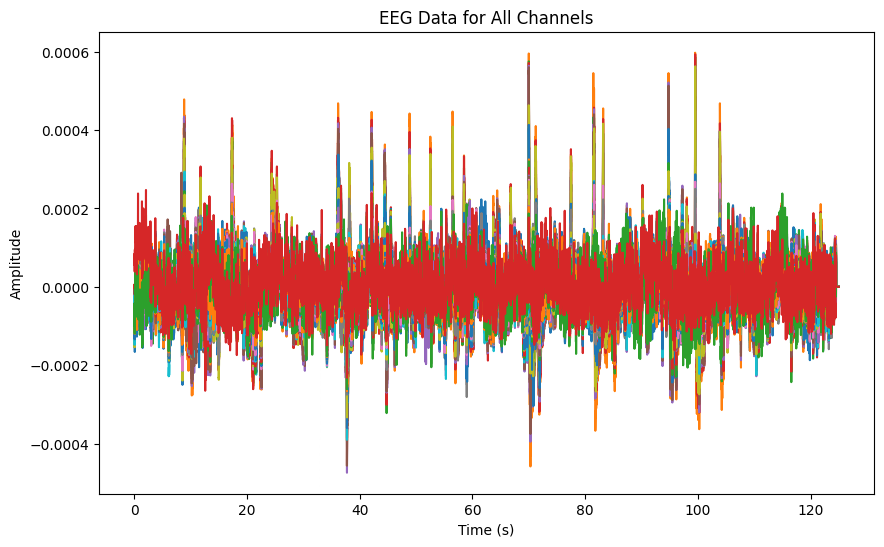

In [8]:
eeg_data = raw_list[1].get_data()
time = raw_list[0].times

# Plot EEG data for all channels using Matplotlib
plt.figure(figsize=(10, 6))
for ch_idx in range(eeg_data.shape[0]):
    plt.plot(time, eeg_data[ch_idx], label=f'Channel {ch_idx + 1}')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data for All Channels')
plt.show()

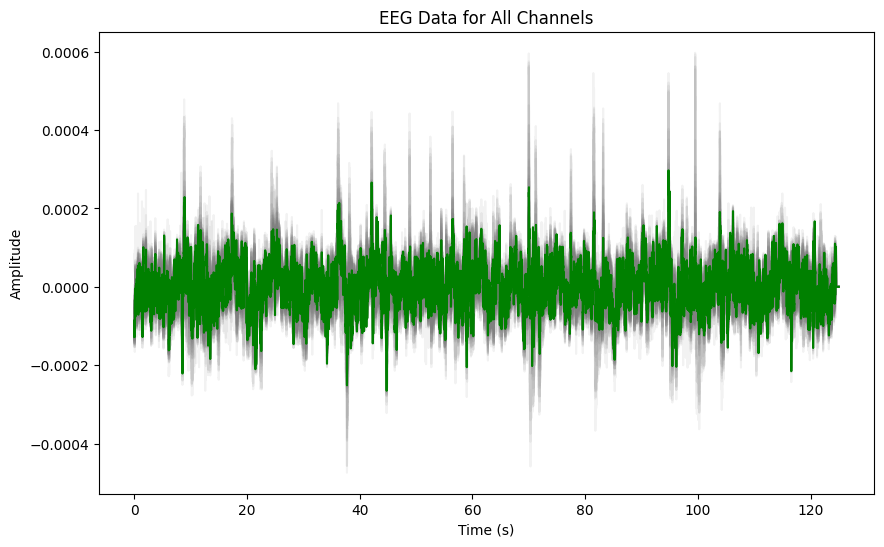

In [30]:
plt.figure(figsize=(10, 6))
for ch_idx in range(eeg_data.shape[0]):
    if ch_idx == 1:
        plt.plot(time, eeg_data[ch_idx], label=f'Channel {ch_idx + 1}', alpha=1, color= 'green', zorder=25)
    else:
        plt.plot(time, eeg_data[ch_idx], label=f'Channel {ch_idx + 1}', alpha=0.1, color='grey')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('EEG Data for All Channels')
plt.show()

In [ ]:
main_folder = './EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0'

subdirectories = [f.path for f in os.scandir(main_folder) if f.is_dir()]

files_to_use = []

for subdirectory in subdirectories:
    files = os.listdir(subdirectory)
    
    if len(files) > 0:
        for file in files:
            
            if file[-6:] == '01.edf':
                first_file_path = os.path.join(subdirectory, file)
                print(first_file_path)
                files_to_use.append(first_file_path)
    else:
        print(f"No files found in {subdirectory}")

In [ ]:
main_folder = './EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0'

subdirectories = [f.path for f in os.scandir(main_folder) if f.is_dir()]


opened_files = []
closed_files = []

for subdirectory in subdirectories:
    files = os.listdir(subdirectory)
    
    if len(files) > 0:
        for file in files:
            
            if file[-6:] == '01.edf':
                eyes_opened = os.path.join(subdirectory, file)
                print(eyes_opened)
                opened_files.append(eyes_opened)

            if file[-6:] == '02.edf':
                eyes_closed = os.path.join(subdirectory, file)
                print(eyes_closed)
                closed_files.append(eyes_closed)
    else:
        print(f"No files found in {subdirectory}")

In [ ]:
opened_files, closed_files

In [ ]:
def plot_this(file_path):
    data = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
    eeg_data = data.get_data()
    time = data.times
    plt.figure(figsize=(10, 6))
    for ch_idx in range(eeg_data.shape[0]):
        plt.plot(time, eeg_data[ch_idx], label=f'Channel {ch_idx + 1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('EEG Data for All Channels')
    return plt.show()

In [ ]:
plot_this(opened_files[0])

In [ ]:
def double_plot(file1, file2):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    fig.suptitle('Eyes Opened vs Eyes Closed')

    data1 = mne.io.read_raw_edf(file1, preload=True, verbose=False)
    data1.filter(1.0, 30.0, fir_design="firwin", skip_by_annotation="edge", verbose=False)
    ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800, verbose=False)
    ica.fit(data1, verbose=False)
    ica.exclude = [1, 2]
    data1 = ica.apply(data1, verbose=False)

    
    data2 = mne.io.read_raw_edf(file2, preload=True, verbose=False)
    data2.filter(1.0, 30.0, fir_design="firwin", skip_by_annotation="edge", verbose=False)
    ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800, verbose=False)
    ica.fit(data2, verbose=False)
    ica.exclude = [1, 2]
    data2 = ica.apply(data2, verbose=False)
    

    good_channels1 = data1.info['ch_names']
    good_channels2 = data2.info['ch_names']

    eeg_data1 = data1.get_data(picks=good_channels1)
    eeg_data2 = data2.get_data(picks=good_channels2)

    time = data1.times

    ax1.plot(time, eeg_data1[0])
    ax1.set_title('Eyes Opened')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    for ch_idx in range(eeg_data1.shape[0]):
        ax1.plot(time, eeg_data1[ch_idx], label=f'Channel {ch_idx + 1}')
    ax1.set_xlim(0, 5)
    ax1.set_ylim(-0.0002, 0.0002)

    ax2.plot(time, eeg_data2[0])
    ax2.set_title('Eyes Closed')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Amplitude')
    for ch_idx in range(eeg_data2.shape[0]):
        ax2.plot(time, eeg_data2[ch_idx], label=f'Channel {ch_idx + 1}')
    ax2.set_xlim(0, 5)
    ax2.set_ylim(-0.0002, 0.0002)
    return plt.show()

In [ ]:
for i in range(1):
    double_plot(opened_files[i], closed_files[i])

In [ ]:
raw.compute_psd(fmax=50).plot(picks="data", exclude="bads")
raw.plot(duration=5, n_channels=30)

In [ ]:
# Load the raw EEG data
edf_file = './EEGData/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf'  # Replace with the path to your EDF file
raw = mne.io.read_raw_edf(edf_file, preload=True, verbose=False)


def compute_psd(data, fs, nperseg=256, noverlap=None):
    """
    Compute Power Spectral Density (PSD) using the Welch method.

    Parameters:
        data (array): EEG data array with shape (n_channels, n_samples).
        fs (float): Sampling frequency.
        nperseg (int): Length of each segment for PSD estimation.
        noverlap (int): Number of overlapping samples between segments.
    
    Returns:
        freqs (array): Frequency values.
        psd (array): Power Spectral Density values.
    """
    n_channels, n_samples = data.shape
    psd = np.zeros((n_channels, nperseg // 2 + 1))

    for ch_idx in range(n_channels):
        f, Pxx = plt.psd(data[ch_idx], Fs=fs, NFFT=nperseg, noverlap=noverlap)
        # Add a small epsilon to avoid zero values
        psd[ch_idx] = Pxx + 1e-10

    return f, psd


# Get the EEG data using .get_data()
eeg_data = raw.get_data()

# Set the sampling frequency
fs = raw.info['sfreq']

# Compute PSD using the custom function
freqs, psd = compute_psd(eeg_data, fs)

# Plot the PSD
plt.figure(figsize=(10, 6))  # Add this line to create a single figure
for ch_idx in range(eeg_data.shape[0]):
    plt.semilogy(freqs, psd[ch_idx], label=f'Channel {ch_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()